In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
import re
import string
import spacy

from tqdm.auto import tqdm
import time

In [2]:
text = pd.read_csv('new_Hotel_reviews_20k.csv')
text.drop_duplicates(inplace=True)
text.head()

,rating_review,review_full
0,5,Been going to honk for quite a while . This ma...
1,1,We have been a frequent visitor at this chain ...
2,5,"Excellent staff, very cooperative and gentle ...."
3,4,I have always visit this place.they always off...
4,5,Lot of appraise about Chef Deepak Chef Wangmo ...


In [3]:
text.isnull().sum()

rating_review    0
review_full      0
dtype: int64

In [4]:
class_counts = text['rating_review'].value_counts()

print('Ratings distribution:')
print(class_counts)

Ratings distribution:
5    8025
4    4993
3    4429
2    1304
1    1245
Name: rating_review, dtype: int64


### 4,5점은 good review / 1,2점은 bad review로 가정

- 근거 : 주어진 분석 목적에 따라 3점을 중립적인 평가로 간주하고 제외. 대부분의 경우, 1점과 2점은 부정적인 평가를 나타내며, 4점과 5점은 긍정적인 평가를 나타냅니다.


- 따라서, 빈도가 높은 단어들을 비교하여 차이를 확인할 때 1점과 2점을 나쁜 호텔 리뷰로, 4점과 5점을 좋은 호텔 리뷰로 간주하는 것은 분석 결과를 해석하고자 함


#### -> 주로, 텍스트 데이터 자체에 대한 분석 수행

In [5]:
# rating_review 값이 4 또는 5인 로우 추출
good_reviews = text[text['rating_review'].isin([4, 5])].copy()

# rating_review 값이 1 또는 2인 로우 추출
bad_reviews = text[text['rating_review'].isin([1, 2])].copy()

#### good_reviews 에 대해 단어 빈도 분석 / Word Cloud

- 단어 빈도 분석:좋은 호텔 리뷰와 나쁜 호텔 리뷰에서 각각 빈도가 높은 단어들을 비교하여 차이를 확인

- Word Cloud:좋은 호텔 리뷰와 나쁜 호텔 리뷰에서 워드 클라우드를 생성하여 차이를 시각적으로 확인

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()
stopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [8]:
good = good_reviews.review_full
good.head()

0    Been going to honk for quite a while . This ma...
2    Excellent staff, very cooperative and gentle ....
3    I have always visit this place.they always off...
4    Lot of appraise about Chef Deepak Chef Wangmo ...
7    Very fantastic snacks and tea available in the...
Name: review_full, dtype: object

In [10]:
import re 

words = []  

for t in good:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(t)) # 영문자만 남기기 

    EnWordsToken = word_tokenize(EnWords.lower()) # (소문자화후) 토큰 나누기 

    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] # stopword

    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] # lemmatize
   
    words.append(EnWordsTokenStopLemma)

In [11]:
from functools import reduce

words2 = list(reduce(lambda x, y: x+y,words))

print(len(words2))

467363


In [12]:
from collections import Counter

count = Counter(words2)

count 

Counter({'going': 430,
         'honk': 27,
         'quite': 904,
         'man': 63,
         'falesh': 4,
         'always': 993,
         'top': 441,
         'job': 152,
         'making': 255,
         'beautiful': 595,
         'cocktail': 453,
         'perfection': 155,
         'advising': 3,
         'best': 2827,
         'delicacy': 160,
         'remarkable': 41,
         'gr': 19,
         'keep': 449,
         'sahil': 18,
         'bhalla': 20,
         'excellent': 1997,
         'staff': 2917,
         'cooperative': 35,
         'gentle': 13,
         'specially': 426,
         'amit': 97,
         'helpful': 492,
         'hardworking': 3,
         'thyme': 36,
         'visit': 2541,
         'place': 7063,
         'offer': 555,
         'good': 7488,
         'food': 11771,
         'one': 3663,
         'thing': 681,
         'hate': 15,
         'long': 455,
         'ques': 5,
         'lunch': 1012,
         'dinner': 1444,
         'time': 2912,
         'g

In [13]:
word_count = {} #딕셔너리 객체

for tag, counts in count.most_common(50): #상위 50개
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

food : 11771
good : 7488
place : 7063
service : 5354
restaurant : 5070
great : 4235
one : 3663
indian : 2927
staff : 2917
time : 2912
best : 2827
delhi : 2786
dish : 2732
nice : 2577
visit : 2541
also : 2450
chicken : 2450
really : 2386
taste : 2376
well : 2309
experience : 2265
amazing : 2228
like : 2054
menu : 2022
excellent : 1997
delicious : 1923
try : 1916
must : 1913
ambience : 1825
would : 1547
go : 1542
served : 1497
meal : 1473
dinner : 1444
friend : 1407
made : 1316
chef : 1265
quality : 1255
get : 1252
love : 1231
hotel : 1178
ordered : 1164
veg : 1151
drink : 1131
went : 1117
family : 1113
make : 1098
tasty : 1092
loved : 1051


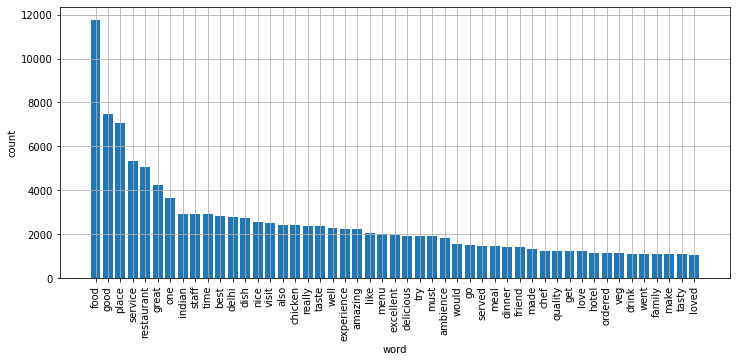

In [14]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True) #keyword
sorted_Values = sorted(word_count.values(), reverse=True)          #count

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='vertical')

plt.show()

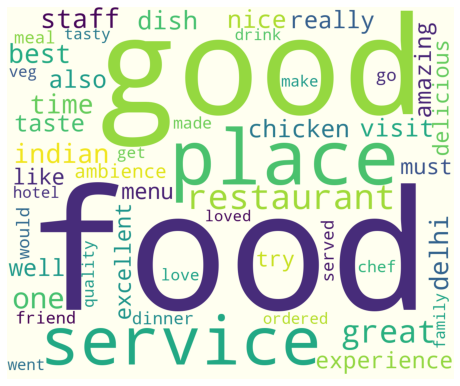

In [15]:
from wordcloud import WordCloud

wc=WordCloud(background_color='ivory', width=1200, height=1000)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

#### bad_reviews에 대한 단어 빈도 분석/Word Cloud

In [17]:
bad = bad_reviews.review_full
bad.head()

1     We have been a frequent visitor at this chain ...
8     I was here for a very special day but these pe...
26    If you only order their dumplings and other st...
39    Chose  to go to this restaurant as read great ...
46    I visited pikwik for in the month of april 201...
Name: review_full, dtype: object

In [18]:
import re 

words = []  

for t in bad:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(t)) # 영문자만 남기기 

    EnWordsToken = word_tokenize(EnWords.lower()) # (소문자화후) 토큰 나누기 

    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] # stopword

    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] # lemmatize
   
    words.append(EnWordsTokenStopLemma)

In [19]:
from functools import reduce

words2 = list(reduce(lambda x, y: x+y,words))

In [20]:
from collections import Counter

count = Counter(words2)

count 

Counter({'frequent': 10,
         'visitor': 22,
         'chain': 39,
         'year': 163,
         'sad': 74,
         'restaurant': 1525,
         'decline': 4,
         'seems': 107,
         'management': 118,
         'completely': 67,
         'indifferent': 23,
         'unfortunate': 6,
         'experience': 576,
         'lunch': 216,
         'afternoon': 38,
         'service': 1365,
         'poor': 299,
         'server': 175,
         'bother': 36,
         'listen': 20,
         'request': 69,
         'ordered': 772,
         'non': 171,
         'spicy': 117,
         'vegetarian': 128,
         'dish': 568,
         'parent': 26,
         'eat': 269,
         'food': 2825,
         'came': 386,
         'different': 100,
         'sauce': 142,
         'loaded': 9,
         'spice': 78,
         'requested': 68,
         'accept': 25,
         'refused': 61,
         'could': 347,
         'immediately': 28,
         'see': 164,
         'displeasure': 1,
         

In [21]:
word_count = {} #딕셔너리 객체

for tag, counts in count.most_common(50): #상위 50개
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

food : 2825
place : 1693
restaurant : 1525
service : 1365
good : 1149
one : 1056
time : 898
ordered : 772
table : 755
staff : 752
like : 745
even : 700
chicken : 699
order : 603
experience : 576
would : 576
taste : 573
dish : 568
go : 531
get : 518
bad : 509
menu : 504
went : 491
quality : 489
served : 481
waiter : 477
asked : 458
also : 456
manager : 446
visit : 439
much : 426
drink : 415
people : 402
never : 397
really : 396
came : 386
better : 380
bill : 378
price : 373
average : 364
back : 364
well : 363
delhi : 360
first : 358
could : 347
got : 347
told : 338
said : 332
indian : 322


In [24]:
del word_count['food']
del word_count['place']
del word_count['service']
del word_count['restaurant']
del word_count['good']

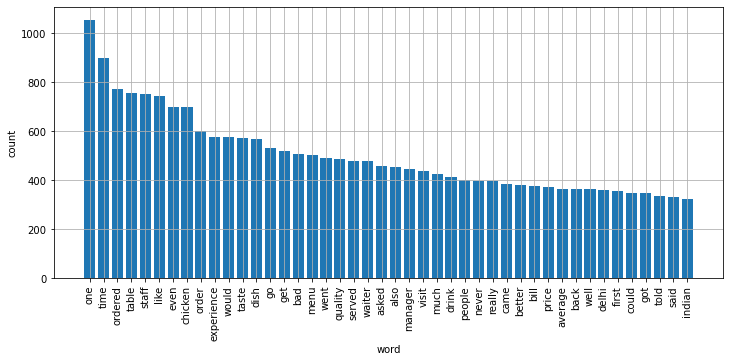

In [25]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True) #keyword
sorted_Values = sorted(word_count.values(), reverse=True)          #count

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='vertical')

plt.show()

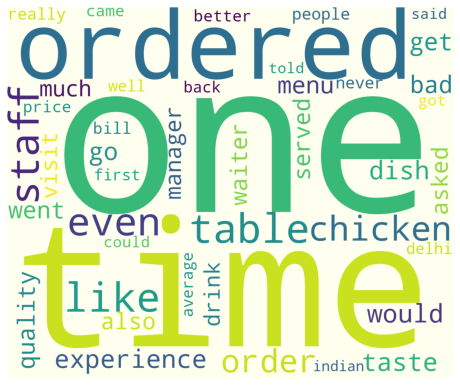

In [26]:
from wordcloud import WordCloud

wc=WordCloud(background_color='ivory', width=1200, height=1000)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

#### TF-IDF 활용하여 단어 중요도 계산 

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer


# rating_review 값이 4 또는 5인 로우 추출
good_reviews = text[text['rating_review'].isin([4, 5])]['review_full']

# rating_review 값이 1 또는 2인 로우 추출
bad_reviews = text[text['rating_review'].isin([1, 2])]['review_full']

# 불용어 제거
stop_words = set(stopwords.words('english'))
tfidf = TfidfVectorizer(stop_words=stop_words)

# 좋은 호텔 리뷰에서 TF-IDF 점수 계산
good_tfidf = tfidf.fit_transform(good_reviews)
good_tfidf_scores = good_tfidf.mean(axis=0)

# 나쁜 호텔 리뷰에서 TF-IDF 점수 계산
bad_tfidf = tfidf.transform(bad_reviews)
bad_tfidf_scores = bad_tfidf.mean(axis=0)

# 단어와 해당 단어의 TF-IDF 점수를 딕셔너리로 저장
word_scores = {}
feature_names = tfidf.get_feature_names()
for idx, score in enumerate(good_tfidf_scores.tolist()[0]):
    word = feature_names[idx]
    word_scores[word] = score

# 좋은 호텔 리뷰에서 TF-IDF 점수가 높은 상위 10개 단어 출력
top_10_good_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 words in good hotel reviews:")
for word, score in top_10_good_words:
    print(f"{word}: {score}")

print('\n')

# 나쁜 호텔 리뷰에서 TF-IDF 점수가 높은 상위 10개 단어 출력
word_scores = {}
for idx, score in enumerate(bad_tfidf_scores.tolist()[0]):
    word = feature_names[idx]
    word_scores[word] = score
    
top_10_bad_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 words in bad hotel reviews:")
for word, score in top_10_bad_words:
    print(f"{word}: {score}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SF314-59\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 words in good hotel reviews:
food: 0.047865662060674746
good: 0.041906780374335734
place: 0.03434021880059527
service: 0.031437487859147975
great: 0.029187013058812872
restaurant: 0.026255666886710317
nice: 0.021756041939244523
staff: 0.02043751922427737
indian: 0.019574947430188432
best: 0.019543212513817885


Top 10 words in bad hotel reviews:
food: 0.04180456344252641
bad: 0.029990116583316007
place: 0.029939887097338608
restaurant: 0.027298035133062542
service: 0.026594181588181828
ordered: 0.023389127777029062
poor: 0.022643358903448183
even: 0.021985661270981692
one: 0.021743438874692107
average: 0.021502121553548973


- 해석

- 좋은 호텔 리뷰에서 TF-IDF 점수가 높은 단어로는 "food", "good", "place", "service", "great" 등이 나타남. 이는 좋은 호텔 리뷰에서는 음식, 좋은 서비스, 멋진 장소 등이 강조되는 경향을 보임

- 나쁜 호텔 리뷰에서는 TF-IDF 점수가 높은 단어로는 "food", "bad", "place", "restaurant", "service" 등이 나타남. 이는 나쁜 호텔 리뷰에서는 음식, 나쁜 서비스, 나쁜 장소 등이 강조되는 경향을 보임

### 이번엔 주로, rating_review 값을 활용하여 분석

#### (1) Rating 값의 분포 분석: 호텔 리뷰의 rating 값의 분포를 확인하여 어떤 rating 값이 주로 나타나는지, 어떤 범위의 rating 값이 좋은 리뷰에 해당하는지 혹은 나쁜 리뷰에 해당하는지 등을 파악

Ratings distribution:
5    8025
4    4993
3    4429
2    1304
1    1245
Name: rating_review, dtype: int64


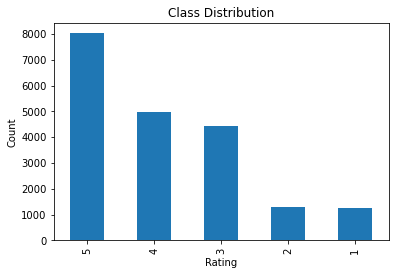

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

class_counts = text['rating_review'].value_counts()

print('Ratings distribution:')
print(class_counts)

class_counts.plot.bar()
plt.title('Class Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#### (2) Rating 값과 단어의 관계 분석: 호텔 리뷰의 rating 값과 특정 단어들의 등장 빈도 혹은 중요도를 비교하여, 특정 단어들이 좋은 리뷰 혹은 나쁜 리뷰에서 더 자주 등장하는지, rating 값과 어떤 상관 관계를 가지는지 등을 분석

### -> 해석:correlation 값이 양수에 가까울수록 특정 단어가 좋은 리뷰와 관련이 높을 가능성이 있고, 음수에 가까울수록 특정 단어가 나쁜 리뷰와 관련이 높을 가능성이 있습니다. 하지만 상관 관계는 인과 관계를 나타내지는 않으므로, 주의해야 합니다. 단어와 rating 값의 상관 관계는 단지 통계적인 연관성을 나타내는 것

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# 불용어 제거
stop_words = set(stopwords.words('english'))
tfidf = TfidfVectorizer(stop_words=stop_words)

# TF-IDF를 활용하여 리뷰 텍스트를 벡터화
tfidf_matrix = tfidf.fit_transform(text['review_full'])

# 벡터화된 리뷰와 rating 값을 결합한 데이터프레임 생성
combined_data = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names()).join(text['rating_review'])

- 각각 top10에 속하는 특정 단어에 대해서 수행해보기 

In [46]:
# 좋은 호텔 리뷰 상위10 특정 단어의 등장 빈도 혹은 중요도와 rating 값의 상관 관계 계산

top_words = ['food', 'good', 'place', 'service', 'great', 'restaurant', 'nice', 'staff', 'indian', 'best']

for word in top_words:
    correlation = combined_data[['rating_review', word]].corr().iloc[0, 1]
    print(f"Correlation between rating and '{word}': {correlation}")

Correlation between rating and 'food': 0.008422608769775615
Correlation between rating and 'good': 0.012155272430660835
Correlation between rating and 'place': -0.010749217865613234
Correlation between rating and 'service': 0.020958053728794612
Correlation between rating and 'great': 0.06675090389214351
Correlation between rating and 'restaurant': -0.0018409017770792985
Correlation between rating and 'nice': 0.03743441181726374
Correlation between rating and 'staff': 0.02688328197355207
Correlation between rating and 'indian': 0.03284368391590192
Correlation between rating and 'best': 0.0474144318900527


In [47]:
# 나쁜 호텔 리뷰 상위10 특정 단어의 등장 빈도 혹은 중요도와 rating 값의 상관 관계 계산

top_words = ['food', 'bad', 'place', 'restaurant', 'service', 'ordered', 'poor', 'even', 'one', 'average']

for word in top_words:
    correlation = combined_data[['rating_review', word]].corr().iloc[0, 1]
    print(f"Correlation between rating and '{word}': {correlation}")

Correlation between rating and 'food': 0.008422608769775615
Correlation between rating and 'bad': -0.07348195457215494
Correlation between rating and 'place': -0.010749217865613234
Correlation between rating and 'restaurant': -0.0018409017770792985
Correlation between rating and 'service': 0.020958053728794612
Correlation between rating and 'ordered': -0.05877360533105563
Correlation between rating and 'poor': -0.09333839599380518
Correlation between rating and 'even': -0.055142162829332694
Correlation between rating and 'one': 0.0008693465854085538
Correlation between rating and 'average': -0.07874753216479305
